In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygsp as pg
from sklearn.cluster import KMeans

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights_clean = pd.read_csv("flights_clean.csv")

In [78]:
adj = np.zeros((14,14))

iata_airlines = np.array(airlines.IATA_CODE)
ista_airports = np.array(airports.IATA_CODE)


airline_adj_per_month = [];
for month in range(1,7):
    flights_mon = flights_clean[flights_clean.MONTH==month]
    airline_in_airports = np.zeros((airlines.shape[0], airports.shape[0]))
    for j in range(iata_airlines.shape[0]):
        i = iata_airlines[j]
        flights_airline =flights_mon[flights_mon.AIRLINE==i]
        ori = np.array(flights_airline.ORIGIN_AIRPORT)
        des = np.array(flights_airline.DESTINATION_AIRPORT)
        orides = np.concatenate((ori, des),0)
        for p in orides:
            airline_in_airports[j,np.where(p==ista_airports)[0]] += 1
    airlines_adj = airline_in_airports.dot(airline_in_airports.T)
    airlines_adj[range(14), range(14)] = 0
    airlines_adj = airlines_adj/np.max(airlines_adj)
    airline_adj_per_month.append(airlines_adj)

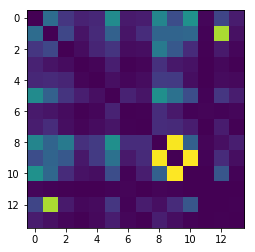

In [105]:
plt.imshow(airline_adj_per_month[0])

In [182]:
G = pg.graphs.Graph(airline_adj_per_month[5])

In [183]:
G.compute_fourier_basis()

In [184]:
kmeans = KMeans(5).fit(G.U[:,range(7)])

In [185]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 0, 2])

In [119]:
U = G.U-np.mean(G.U, 0).reshape((1,-1))
covar = U.T.dot(U)
e,v = np.linalg.eigh(covar)

In [173]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [181]:
G0 = nx.from_numpy_array(airline_adj_per_month[0])

c:\users\67009\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


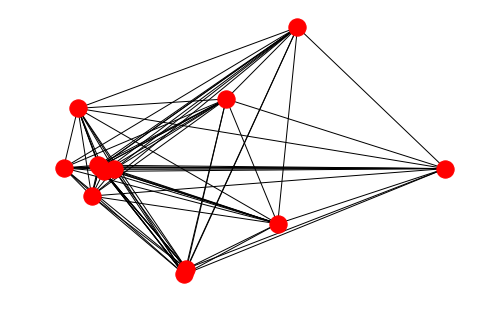

In [189]:
nx.draw_kamada_kawai(G0)

In [192]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.
